In [1]:
import numpy as np
np.random.seed(10)
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding,RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier

In [2]:
#skin dataset - 3 features and 1 target
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
skin_data_raw = pd.read_csv(url,sep='\t',names=['x1','x2','x3','target'])
print(skin_data_raw['target'].unique())
skin_data_raw['target']=skin_data_raw['target'].map({1:0,2:1})
skin_data_raw.head()
skin_data_raw['target'].unique()
len(skin_data_raw['x1'].unique())
X = skin_data_raw.values[:,:3]
y = skin_data_raw.values[:,3]
#X_test,y_test used for final model evaluation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
#creating a second subset of the training_data for the second model in the ensamble (logit)
X_train_rf, X_train_lr, y_train_rf, y_train_lr = train_test_split(X_train,y_train,test_size=0.5,random_state=0)

[1 2]


In [3]:
from tree_feature_transformation_v1 import TreeTransformClf
%load_ext autoreload
%autoreload 2

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
params = {'n_estimators':10,
          'max_depth':5,
          'random_state':0}

tree_clf = RandomForestClassifier

pipeline = Pipeline([('scaling',StandardScaler()),
                     ('feat_selection',SelectKBest(k=2)),
                     ('classification',TreeTransformClf(tree_clf,
                                                        tree_params=params,
                                                        logit_C=0.1))])

In [5]:
pipeline.fit(X_train,y_train)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feat_selection', SelectKBest(k=2, score_func=<function f_classif at 0x000002239F8A07B8>)), ('classification', <tree_feature_transformation_v1.TreeTransformClf object at 0x00000223A0228710>)])

In [7]:
pipeline.predict(X_test)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
pipeline.predict_proba(X_test)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[  3.66000763e-04,   9.99633999e-01],
       [  9.36988452e-01,   6.30115483e-02],
       [  3.37700213e-02,   9.66229979e-01],
       ..., 
       [  5.00441164e-06,   9.99994996e-01],
       [  3.60260355e-04,   9.99639740e-01],
       [  6.09304043e-04,   9.99390696e-01]])

In [9]:
rf_pred = pipeline.predict_proba(X_test)[:,1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, rf_pred)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


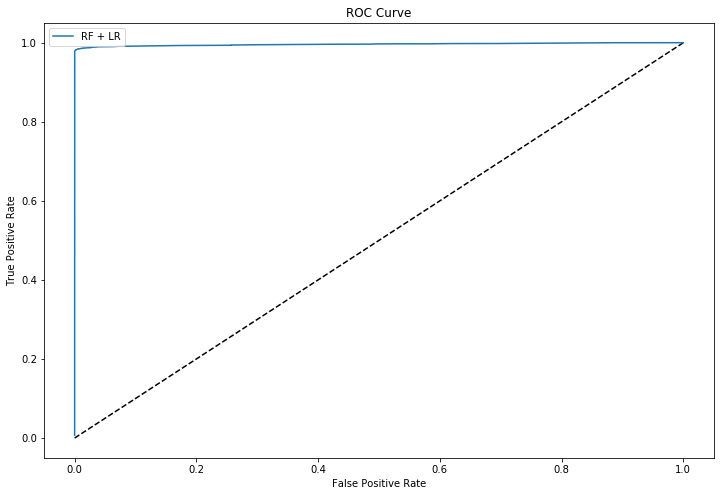

In [10]:
#plotting the results
plt.figure(figsize=(12,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [11]:
tree_clf = GradientBoostingClassifier

params = {'n_estimators':10}

pipeline = Pipeline([('scaling',StandardScaler()),
                     ('feat_selection',SelectKBest(k=2)),
                     ('classification',TreeTransformClf(tree_clf,
                                                        tree_params=params,
                                                        logit_C=0.1))])

In [12]:
pipeline.fit(X_train,y_train)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feat_selection', SelectKBest(k=2, score_func=<function f_classif at 0x000002239F8A07B8>)), ('classification', <tree_feature_transformation_v1.TreeTransformClf object at 0x00000223A088B780>)])

In [13]:
pipeline.predict(X_test)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
pipeline.predict_proba(X_test)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[  8.09401027e-05,   9.99919060e-01],
       [  9.15372917e-01,   8.46270830e-02],
       [  5.57679008e-02,   9.44232099e-01],
       ..., 
       [  8.09401027e-05,   9.99919060e-01],
       [  1.36931741e-03,   9.98630683e-01],
       [  1.36931741e-03,   9.98630683e-01]])

In [15]:
tree_clf = RandomTreesEmbedding

params = {'n_estimators':10,
          'max_depth':5,
          'random_state':0}


pipeline = Pipeline([('scaling',StandardScaler()),
                     ('feat_selection',SelectKBest(k=2)),
                     ('classification',TreeTransformClf(tree_clf,
                                                        tree_params=params,
                                                        logit_C=0.1))])

In [16]:
pipeline.fit(X_train,y_train)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feat_selection', SelectKBest(k=2, score_func=<function f_classif at 0x000002239F8A07B8>)), ('classification', <tree_feature_transformation_v1.TreeTransformClf object at 0x00000223A0E723C8>)])

In [17]:
pipeline.predict(X_test)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
pipeline.predict_proba(X_test)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[  1.91187335e-05,   9.99980881e-01],
       [  9.84155924e-01,   1.58440759e-02],
       [  2.87591430e-02,   9.71240857e-01],
       ..., 
       [  1.26878228e-03,   9.98731218e-01],
       [  7.96446406e-04,   9.99203554e-01],
       [  1.73766417e-03,   9.98262336e-01]])

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=0)
cv_results_f1 = cross_val_score(pipeline,X_train,y_train,cv=kfold,scoring='f1')

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\bnedanov\AppData\Lo

In [61]:
cv_results_f1

array([ 0.98161234,  0.97647653,  0.97926448,  0.97573515,  0.97544105,
        0.97614237,  0.97380321,  0.9766917 ,  0.97709686,  0.97623315])

In [33]:
#Cross vaalidated model building
from sklearn.cross_validation import StratifiedKFold
n_folds = 10
kfold = StratifiedKFold(y=y_train,n_folds=n_folds,random_state=0)

In [34]:
from scipy.sparse import csr_matrix,hstack,vstack

In [43]:
a = csr_matrix((3, 4), dtype=np.int8).toarray()

In [44]:
a

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [39]:
b = csr_matrix((3,4),dtype=np.int8)

In [42]:
vstack((a,b)).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [22]:
#empty arrays to hold the predicted and targeted values
full_pred_array = np.array([])
target_actual_array = np.array([])
encoder = OneHotEncoder()
#looping through all of the folds - the model is exected on each train set and an out of fold prediction is made
#the out of fold predictions are stored in the full_pred_array
for i,(train,test) in enumerate(kfold):
    clf=RandomForestClassifier()
    clf.fit(X[train],y[train])
    encoder.fit(clf.apply(X[train]))
    
    transformed = encoder.transform(clf.apply(X[test]))
    
    print(transformed.shape)
    print(transformed[0])
    print(transformed.dtype)
    print(type(transformed))
    
    #full_pred_array = np.concatenate((full_pred_array,y_pred),axis=0)
    #combine the folds into a target set
    #target_actual_array = np.concatenate((target_actual_array,y[test]))

(16420, 2117)
  (0, 1893)	1.0
  (0, 1677)	1.0
  (0, 1527)	1.0
  (0, 1276)	1.0
  (0, 1063)	1.0
  (0, 840)	1.0
  (0, 603)	1.0
  (0, 360)	1.0
  (0, 166)	1.0
  (0, 19)	1.0
float64
<class 'scipy.sparse.csr.csr_matrix'>
(16419, 2416)
  (0, 2220)	1.0
  (0, 1950)	1.0
  (0, 1693)	1.0
  (0, 1416)	1.0
  (0, 1150)	1.0
  (0, 961)	1.0
  (0, 736)	1.0
  (0, 524)	1.0
  (0, 243)	1.0
  (0, 40)	1.0
float64
<class 'scipy.sparse.csr.csr_matrix'>
(16419, 2663)
  (0, 2635)	1.0
  (0, 2349)	1.0
  (0, 2011)	1.0
  (0, 1655)	1.0
  (0, 1460)	1.0
  (0, 1294)	1.0
  (0, 1062)	1.0
  (0, 686)	1.0
  (0, 391)	1.0
  (0, 172)	1.0
float64
<class 'scipy.sparse.csr.csr_matrix'>
(16419, 1713)
  (0, 1648)	1.0
  (0, 1532)	1.0
  (0, 1307)	1.0
  (0, 1172)	1.0
  (0, 1024)	1.0
  (0, 822)	1.0
  (0, 627)	1.0
  (0, 468)	1.0
  (0, 284)	1.0
  (0, 137)	1.0
float64
<class 'scipy.sparse.csr.csr_matrix'>
(16419, 2684)
  (0, 2645)	1.0
  (0, 2427)	1.0
  (0, 2071)	1.0
  (0, 1730)	1.0
  (0, 1497)	1.0
  (0, 1306)	1.0
  (0, 1121)	1.0
  (0, 929)	1.0

In [117]:
print(target_actual_array)
print(full_pred_array)
print(len(target_actual_array))
print(len(full_pred_array))

[ 0.  0.  0. ...,  1.  1.  1.]
[ 0.  0.  0. ...,  1.  1.  1.]
164188
164188


In [89]:
len(results_dict[0])*10

164200

In [103]:
len(full_pred_array)

164188

In [91]:
len(y_train)

164188

In [104]:
full_pred_array

array([ 1.,  0.,  0., ...,  1.,  1.,  1.])

In [94]:
a = np.array([1,2,3])

In [95]:
b = np.array([4,5,6])

In [99]:
np.concatenate((a,b),axis=0)

array([1, 2, 3, 4, 5, 6])

In [101]:
np.array([])

array([], dtype=float64)

In [49]:
params = {'n_estimators':10,
          'max_depth':5,
          'random_state':0}

tree_clf = RandomForestClassifier

pipeline = Pipeline([('scaling',StandardScaler()),
                     ('feat_selection',SelectKBest(k=2)),
                     ('classification',TreeTransformClf(tree_clf,
                                                        tree_params=params,
                                                        logit_C=0.1,
                                                        cv_stack='Yes'))])

TypeError: __init__() got an unexpected keyword argument 'cv_stack'

In [48]:
pipeline.fit(X_train,y_train)

C:\Users\bnedanov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


float64
(16420, 273)
<class 'scipy.sparse.csr.csr_matrix'>
float64
(16419, 276)
<class 'scipy.sparse.csr.csr_matrix'>


ValueError: incompatible dimensions for axis 1